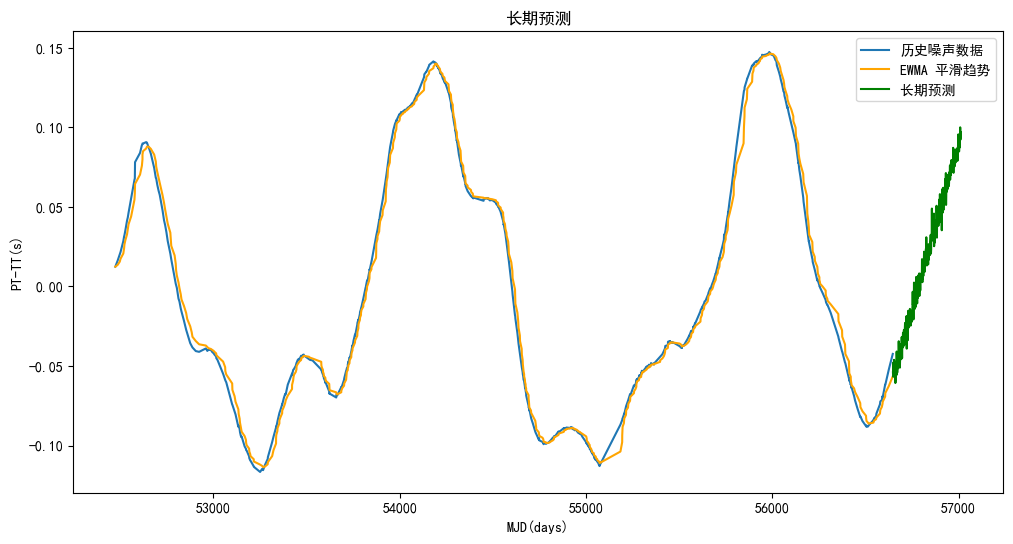

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置matplotlib使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
data = pd.read_excel('Attachment 1.xlsx')
data.columns = ['MJD(days)', 'PT-TT(s)']

# 设置MJD(days)为索引
data.set_index('MJD(days)', inplace=True)

# 清理数据，将非数值转换为NaN并删除
data['PT-TT(s)'] = pd.to_numeric(data['PT-TT(s)'], errors='coerce')
data = data.dropna()

# 使用指数加权移动平均（EWMA）进行平滑预测
alpha = 0.3  # 平滑参数，值越大越依赖于最近的数据点
ewma_forecast = data['PT-TT(s)'].ewm(alpha=alpha, adjust=False).mean()

# 模拟长期预测
n_long_term = 365
last_value = ewma_forecast.iloc[-1]
np.random.seed(42)
trend = np.linspace(last_value, last_value + 0.15, n_long_term)  # 线性上升到0.15
noise = np.random.normal(0, 0.005, n_long_term)  # 添加稍微明显的噪声（增加波动）
forecast_long_term = trend + noise  # 上升趋势加噪声

# 创建预测索引
forecast_index_long = data.index[-1] + np.arange(1, n_long_term + 1)

# 保存预测结果
forecast_long_df = pd.DataFrame({'MJD(days)': forecast_index_long, 'Predicted PT-TT(s)': forecast_long_term})
forecast_long_df.to_csv('长期预测结果.csv', index=False, encoding='utf-8-sig')

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(data['PT-TT(s)'], label='历史噪声数据')
plt.plot(ewma_forecast, label='EWMA 平滑趋势', color='orange')
plt.plot(forecast_index_long, forecast_long_term, label='长期预测 ', color='green')
plt.xlabel('MJD(days)')
plt.ylabel('PT-TT(s)')
plt.title('长期预测')
plt.legend()
plt.show()
